Chapter 1b: Twelve Pitches, Seven Pitches, and the Circle of Fifths
==============================

***

Here, again, is the complete chromatic scale:

In [1]:
twelve_note_scale = 0b111111111111

And here is how they sound, ordered as they are on the 'circle of fifths':

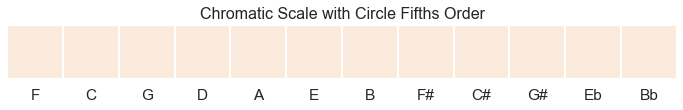

In [14]:
import numpy as np
import jupyter_pt_tools as jpt_pt
import IPython.display as ipd
import pt_utils

jpt_pt.notegroup_heatmap(twelve_note_scale, chromatic=False, title="Chromatic Scale with Circle Fifths Order")
circle_order = [0b100000000000 >> i for i in range(12)]
ipd.Audio(jpt_pt.link_wavestep_sequences(circle_order), rate=4000)

## C Major Scale, rearranged

And, here, again, is the C Major, scale, but this time in the order of the circle of fifths.

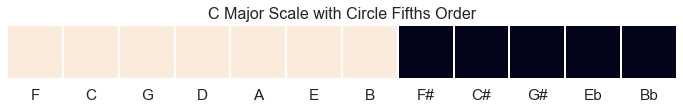

In [15]:
# and then we can make an image (or two)
CM_scale = 0b101011010101
CM_scale = pt_utils.c_chrom_to_f_circle(CM_scale)
jpt_pt.notegroup_heatmap(CM_scale, chromatic=False, title="C Major Scale with Circle Fifths Order")
circle_order = [0b100000000000 >> i for i in range(7)]
ipd.Audio(jpt_pt.link_wavestep_sequences(circle_order), rate=4000)

Or, rearranged ascending:

In [4]:
ipd.Audio(jpt_pt.notegroup_wavestep(CM_scale, chromatic=False), rate=4000)

The pattern above is the familiar piano keyboard: black keys, white keys -- but now rearranged by fifths (ratios of 3:2). 

It takes on a clearly visible order. A major scale contains only 7 proximate notes in the circle of fifths.|

## C Major Chord, rearranged

Last, if there aren't too many notes, and they are well spaced (more about that later), we can hear them as chords:

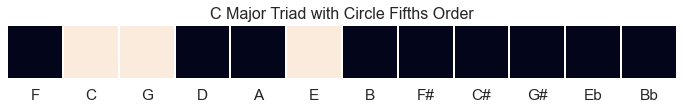

In [17]:
c_major = 0b100010010000
c_major = pt_utils.c_chrom_to_f_circle(c_major)

jpt_pt.notegroup_heatmap(c_major, chromatic=False, title="C Major Triad with Circle Fifths Order")

c_major_signal = jpt_pt.notegroup_wavepile(c_major, chromatic=False)
ipd.Audio(c_major_signal, rate=4000)

What becomes interesting in terms of computation in memory is that the **major scale is a prime-numbered subset of the twelve-note scale**, so it can be subdivided into ordered sets which imply the (prime) unity of the entire scale. 

For example, the C Major chord shows up as 'every fourth note in the group of notes from F to B, starting at C'.

# All the chords of C Major, in one stripe.

And all chords in C major can be described in pretty much the same way:

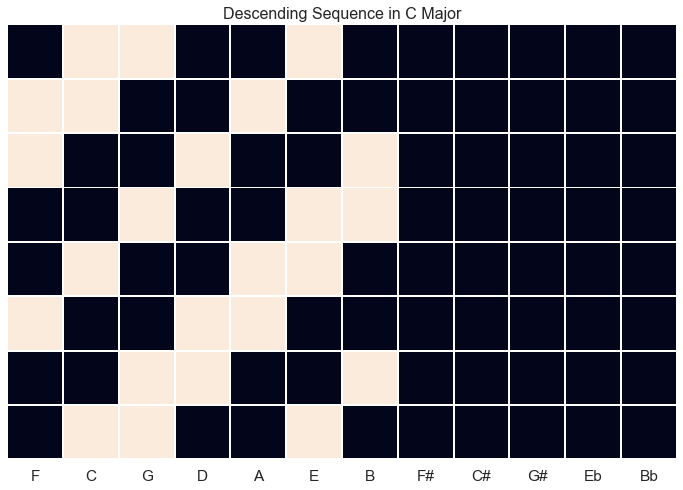

In [19]:
import harmony_state
harmony = harmony_state.harmony_state(np.array([0,0,1,4,2]))
C_M_seq = []
for i in range(8):
    C_M_seq.append(pt_utils.c_chrom_to_f_circle(harmony.current_binary))
    harmony.param_increment(2, -1)

jpt_pt.multiple_notegroup_heatmap(C_M_seq, chromatic=False, title="Descending Sequence in C Major")

c_major_signal = jpt_pt.link_wavepile_sequences(C_M_seq, chromatic=False, duration=6)
ipd.Audio(c_major_signal, rate=4000)

The voicing quite reasonable for such a pure algorithm, and the tensions within the key are very clear.

What seems most interesting is that this farily complex set of ordered sounds sits within a visibly simple organization of information, creating three levels of identity:
1. the individual notes
2. the seven-tone set
3. the structure of the chord (sliding to the left)

# A Small Experiment: changing key

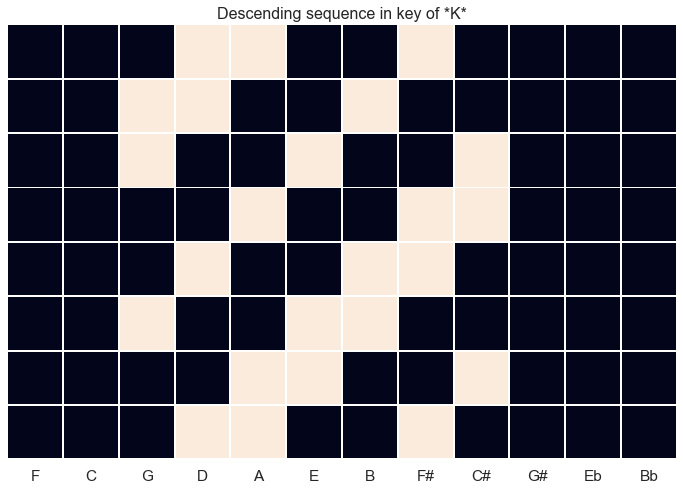

In [22]:
#change key here
k = 2

# change this code at your own risk... 
h = harmony_state.harmony_state(np.array([k,0,1,4,2]))
C_M_seq = []
for i in range(8):
    C_M_seq.append(pt_utils.c_chrom_to_f_circle(h.current_binary))
    h.param_increment(2, -1)

jpt_pt.multiple_notegroup_heatmap(C_M_seq, chromatic=False, title="Descending sequence in key of *K*")

c_major_signal = jpt_pt.link_wavepile_sequences(C_M_seq, chromatic=False, duration=6)
ipd.Audio(c_major_signal, rate=4000)